In [17]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Question 1


In [ ]:
def harris_corner_detection(image, block_size=2, ksize=3, k=0.04):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)
    dst = cv2.cornerHarris(gray, block_size, ksize, k)
    dst = cv2.dilate(dst, None)

    threshold = 0.05 * dst.max()

    corner_image = np.copy(image)

    for j in range(0, dst.shape[0]):
        for i in range(0, dst.shape[1]):
            if dst[j, i] > threshold:
                cv2.circle(corner_image, (i, j), 1, (0, 255, 0), 1)

    return corner_image

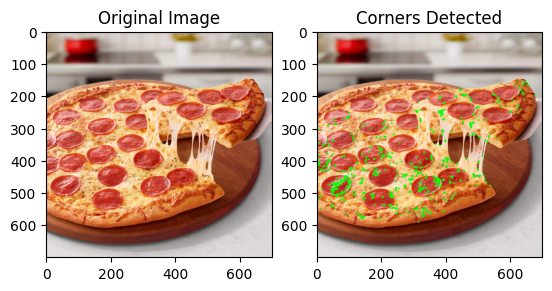

In [ ]:
image = cv2.imread(
    "/content/drive/MyDrive/storage extension/Colab Notebooks/CSE463/Lab 3/23341134_UdoySaha_Lab3/Images/Pizza.jpeg"
)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

corners = harris_corner_detection(image)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(corners, cmap="gray")
plt.title("Corners Detected")

plt.show()

Analysis:

1.  Harris corner detection algorithm doesnt detect pepperoni slices as those are round.
2.  Crust edges are not detected with great precision at all.
3.  It doesnt capture the cheese textures very clearly. Even the corners between cheese strings are not identified properly, although those are somewhat stright.

Harris corner works perfectly with the simple straight lines and the intersections (corners) caused by those, as it depends on gradient shift. Rounded shapes have a regular gradient shifting process, making this algorithm ineffective.


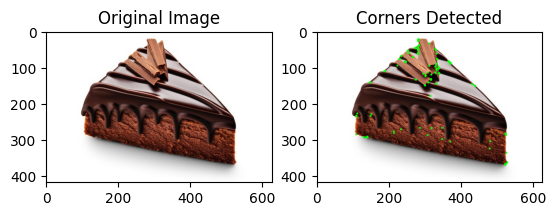

In [ ]:
image = cv2.imread(
    "/content/drive/MyDrive/storage extension/Colab Notebooks/CSE463/Lab 3/23341134_UdoySaha_Lab3/Images/Cake.jpg"
)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

corners = harris_corner_detection(image)

plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(corners, cmap="gray")
plt.title("Corners Detected")

plt.show()

Here the detection is quite on point. The algorithm can detect sharp corners quite well. But it struggles with rounded edges.


# Question 2


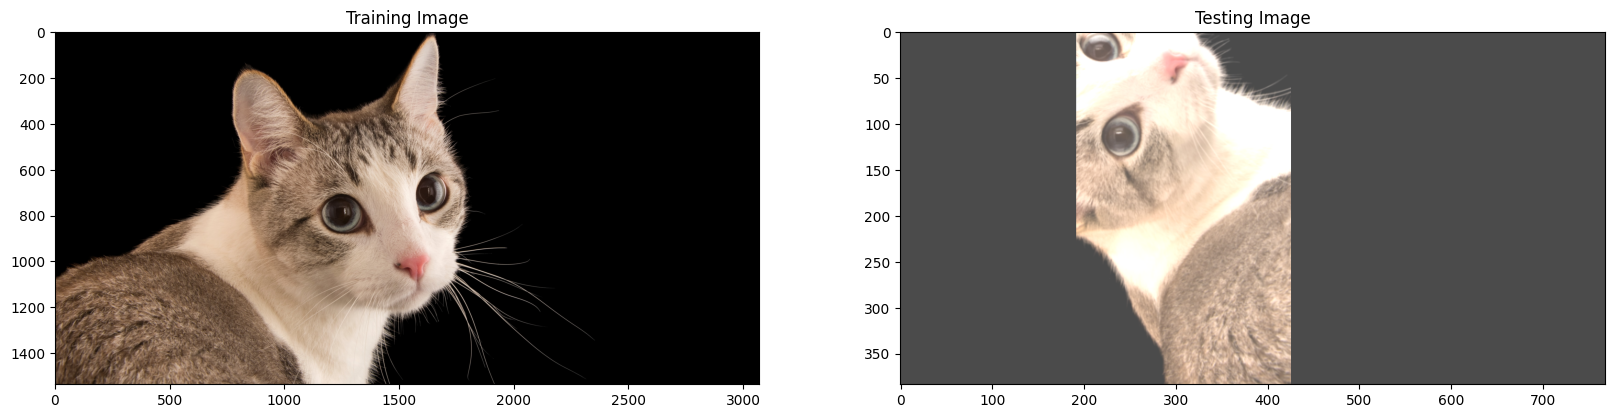

In [ ]:
# Part 1

image1 = cv2.imread(
    "/content/drive/MyDrive/storage extension/Colab Notebooks/CSE463/Lab 3/23341134_UdoySaha_Lab3/Images/Cat.jpg"
)
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Scaling the image down
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

# Shifting the image horizontally and vertically
translation_matrix = np.float32([[1, 0, 150], [0, 1, -150]])
test_image = cv2.warpAffine(test_image, translation_matrix, (num_cols, num_rows))

# Rotating the image
rotation_matrix = cv2.getRotationMatrix2D((num_cols / 2, num_rows / 2), 90, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

# increasing the brightness of the image
brightness_matrix = np.ones(test_image.shape, dtype="uint8") * 75
test_image = cv2.add(test_image, brightness_matrix)

# Saving the test image
cv2.imwrite(
    "/content/drive/MyDrive/storage extension/Colab Notebooks/CSE463/Lab 3/23341134_UdoySaha_Lab3/Images/Cat_transformed.jpg",
    test_image,
)

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 2, figsize=(20, 10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Testing Image")
plots[1].imshow(test_image)

Number of Keypoints Detected In The Training Image:  12254
Number of Keypoints Detected In The Query Image:  519


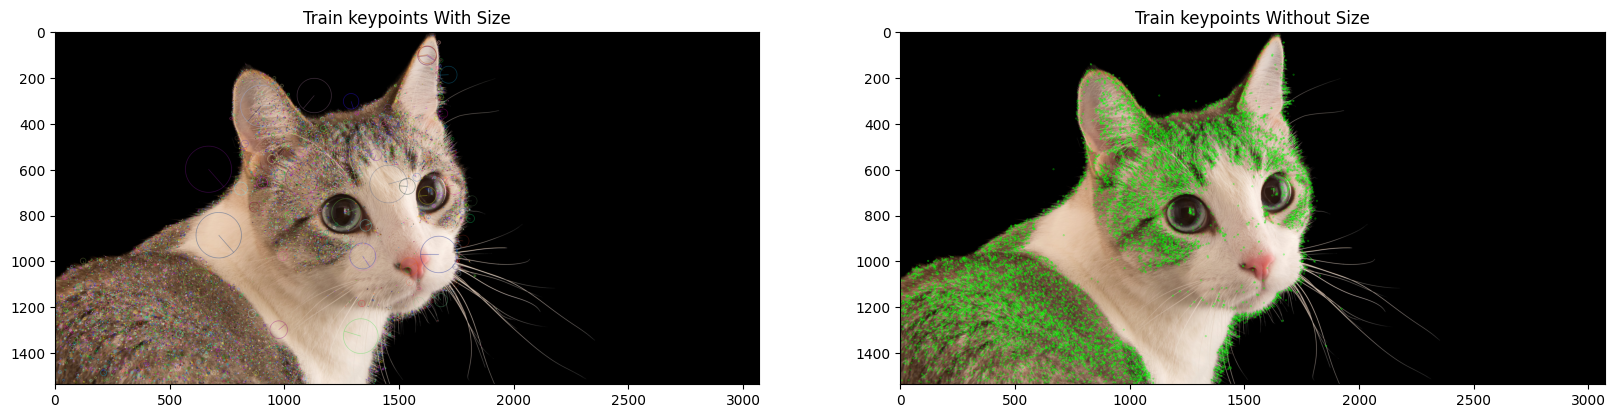

In [ ]:
# Part 2

sift = cv2.SIFT_create()

train_keypoints, train_descriptor = sift.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(
    training_image, train_keypoints, keypoints_without_size, color=(0, 255, 0)
)

cv2.drawKeypoints(
    training_image,
    train_keypoints,
    keypoints_with_size,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20, 10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap="gray")

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap="gray")

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

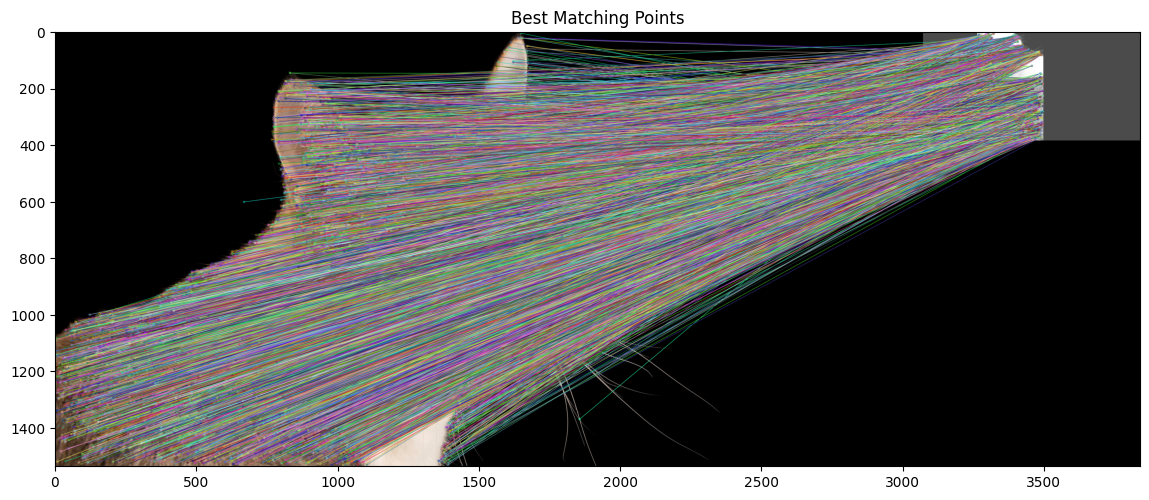


Number of Matching Keypoints Between The Training and Query Images:  12254


In [ ]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key=lambda x: x.distance)

result = cv2.drawMatches(
    training_image,
    train_keypoints,
    test_gray,
    test_keypoints,
    matches,
    test_gray,
    flags=2,
)

# Saving the result image
cv2.imwrite(
    "/content/drive/MyDrive/storage extension/Colab Notebooks/CSE463/Lab 3/23341134_UdoySaha_Lab3/Images/Cat_matched.jpg",
    result,
)

# Display the best matching points
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("Best Matching Points")
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print(
    "\nNumber of Matching Keypoints Between The Training and Query Images: ",
    len(matches),
)

So, this is working pretty well, as it shows a high matching score.

Lets try with a dog now.


Number of Keypoints Detected In The Test Image:  6304


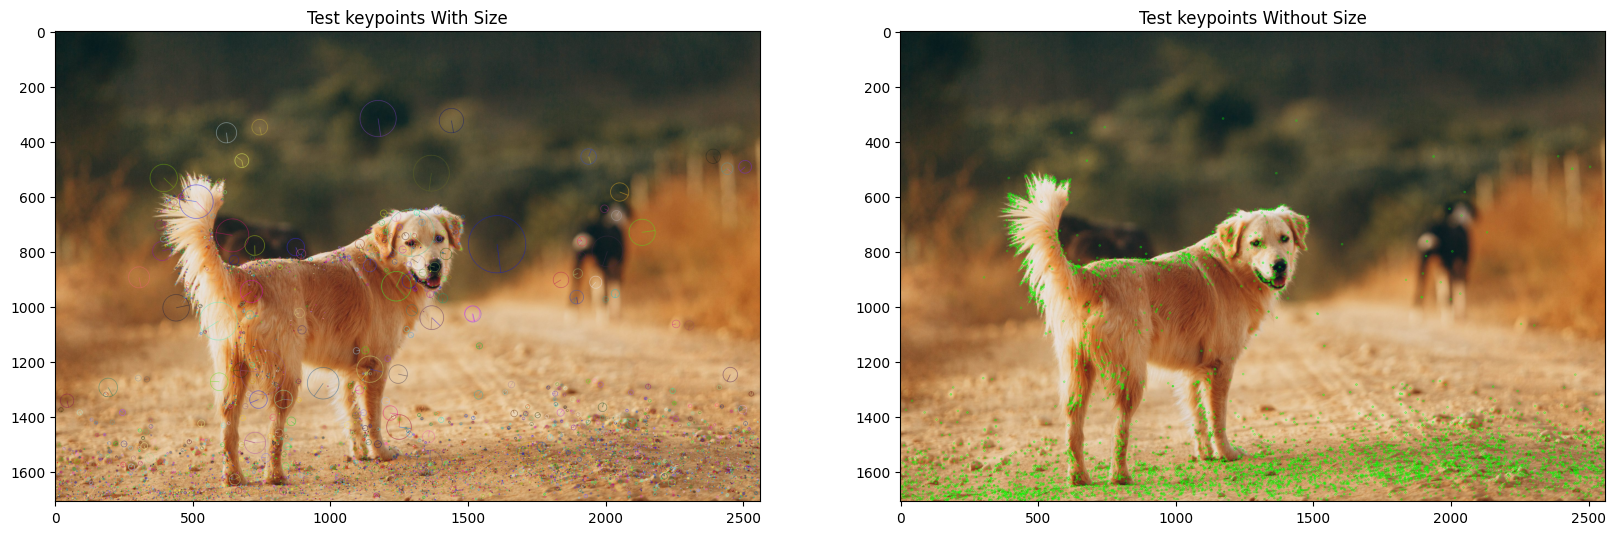

In [ ]:
image2 = cv2.imread(
    "/content/drive/MyDrive/storage extension/Colab Notebooks/CSE463/Lab 3/23341134_UdoySaha_Lab3/Images/Dog.jpg"
)
test_image = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

test_keypoints, test_descriptor = sift.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(test_image)
keypoints_with_size = np.copy(test_image)

cv2.drawKeypoints(test_image, test_keypoints, keypoints_without_size, color=(0, 255, 0))

cv2.drawKeypoints(
    test_image,
    test_keypoints,
    keypoints_with_size,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS,
)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20, 10))

plots[0].set_title("Test keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap="gray")

plots[1].set_title("Test keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap="gray")

# Print the number of keypoints detected in the test image
print("Number of Keypoints Detected In The Test Image: ", len(test_keypoints))

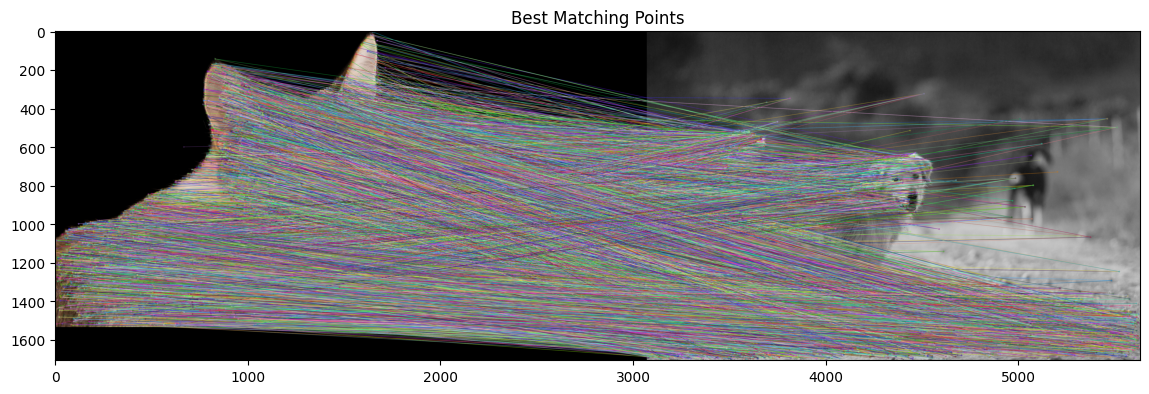


Number of Matching Keypoints Between The Training and Query Images:  12254


In [ ]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_L1, crossCheck=False)

# Perform the matching between the SIFT descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key=lambda x: x.distance)

result = cv2.drawMatches(
    training_image,
    train_keypoints,
    test_gray,
    test_keypoints,
    matches,
    test_gray,
    flags=2,
)

# Display the best matching points
plt.rcParams["figure.figsize"] = [14.0, 7.0]
plt.title("Best Matching Points")
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print(
    "\nNumber of Matching Keypoints Between The Training and Query Images: ",
    len(matches),
)

Here, SIFT is confusing between the two completely different pictures. It tries to match the cats face with the ground the dog is standing on. So clearly, it cannot handle such cases.


# Question 3


In [82]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
def build_vgg_model(input_shape=(256, 256, 3), output_shape=1000):

    model = Sequential()

    # Block 1
    model.add(Conv2D(64, (3, 3), activation="relu", input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 2
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(Conv2D(128, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 3
    model.add(Conv2D(256, (3, 3), activation="relu"))
    model.add(Conv2D(256, (3, 3), activation="relu"))
    model.add(Conv2D(256, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 4
    model.add(Conv2D(512, (3, 3), activation="relu"))
    model.add(Conv2D(512, (3, 3), activation="relu"))
    model.add(Conv2D(512, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    # Block 5
    model.add(Conv2D(512, (3, 3), activation="relu"))
    model.add(Conv2D(512, (3, 3), activation="relu"))
    model.add(Conv2D(512, (3, 3), activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    model.add(Dense(4096, activation="relu"))
    model.add(Dense(4096, activation="relu"))

    # Outputs a single probability for binary classification
    if output_shape > 1:
        model.add(Dense(output_shape, activation="softmax"))
    else:
        model.add(Dense(1, activation="sigmoid"))

    # Configures the model for training
    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

    return model


# Define the model
model = build_vgg_model(output_shape=1)

# Show summary of the model architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_26 (Conv2D)                   │ (None, 254, 254, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 252, 252, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 126, 126, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 124, 124, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 122, 122, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 61, 61, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_30 (Conv2D)                   │ (None, 59, 59, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_31 (Conv2D)                   │ (None, 57, 57, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 55, 55, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 27, 27, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 25, 25, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_34 (Conv2D)                   │ (None, 23, 23, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_35 (Conv2D)                   │ (None, 21, 21, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 10, 10, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_36 (Conv2D)                   │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_37 (Conv2D)                   │ (None, 6, 6, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_38 (Conv2D)                   │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 2, 2, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │       8,392,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 39,892,801 (152.18 MB)

 Trainable params: 39,892,801 (152.18 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
x_train = []
y_train = []


def data_preprocessing(a, b, cls):
    for i in range(a, b):
        image = cv2.imread(
            f"/content/drive/MyDrive/storage extension/Colab Notebooks/CSE463/Lab 3/23341134_UdoySaha_Lab3/Images/{i}.jpg"
        )
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Resizing to 256x256
        image = cv2.resize(image, (256, 256), interpolation=cv2.INTER_AREA)

        x_train.append(image)
        y_train.append(cls)


data_preprocessing(1, 11, 0)
data_preprocessing(11, 21, 1)

x_train = np.array(x_train)
y_train = np.array(y_train)

print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")

x_train shape: (20, 256, 256, 3)
y_train shape: (20,)


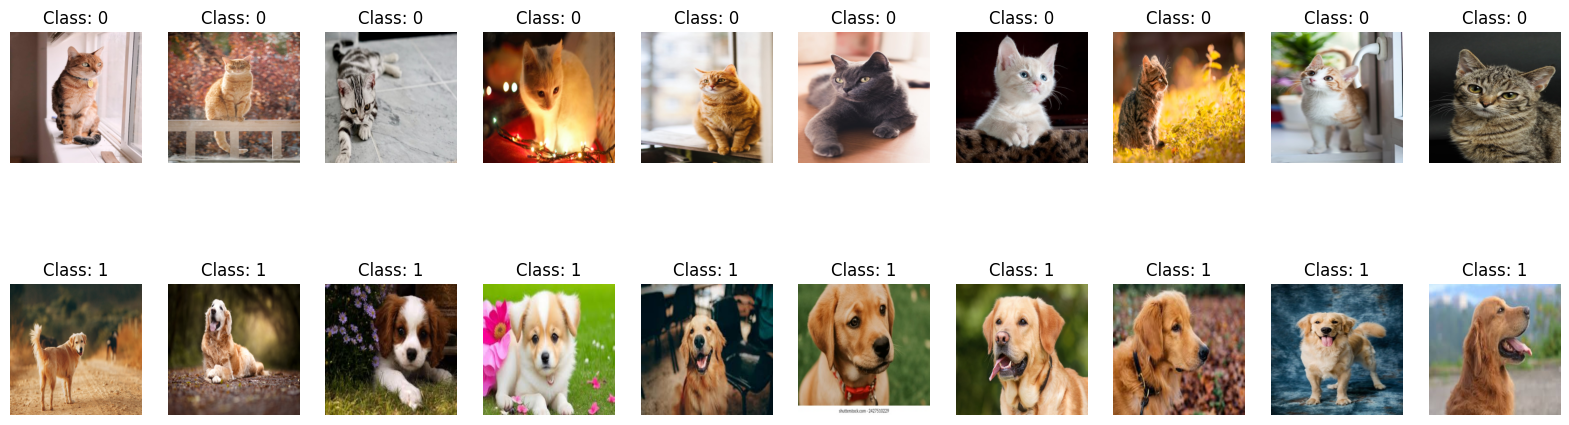

In [ ]:
# Visualizing the dataset
plt.figure(figsize=(20, 6))
for i in range(2):
    for j in range(10):
        plt.subplot(2, 10, i * 10 + j + 1)
        plt.imshow(x_train[i * 10 + j])
        plt.title(f"Class: {y_train[i*10+j]}")
        plt.axis("off")

plt.show()

In [86]:
model.fit(x_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 39s 17s/step - accuracy: 0.5833 - loss: 85.0488 - val_accuracy: 1.0000 - val_loss: 0.0336
Epoch 2/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 19s/step - accuracy: 0.3333 - loss: 2.3018 - val_accuracy: 0.0000e+00 - val_loss: 0.7005
Epoch 3/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 32s 17s/step - accuracy: 0.6667 - loss: 1.2702 - val_accuracy: 0.0000e+00 - val_loss: 0.7475
Epoch 4/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 44s 21s/step - accuracy: 0.5417 - loss: 0.7168 - val_accuracy: 1.0000 - val_loss: 0.4457
Epoch 5/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 38s 17s/step - accuracy: 0.5833 - loss: 0.7481 - val_accuracy: 0.0000e+00 - val_loss: 1.4175
Epoch 6/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 31s 17s/step - accuracy: 0.5833 - loss: 0.7782 - val_accuracy: 0.0000e+00 - val_loss: 0.8312
Epoch 7/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 41s 17s/step - accuracy: 0.6667 - loss: 1.1237 - val_accuracy: 1.0000 - val_loss: 5.6030e-05
Epoch 8/20
2/2 ━━━━━━━━━━━━━━━━━━━━ 42s 17s/step - accuracy: 0.2917 - loss: 4.9236 - val_accuracy: 1.000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 463ms/step


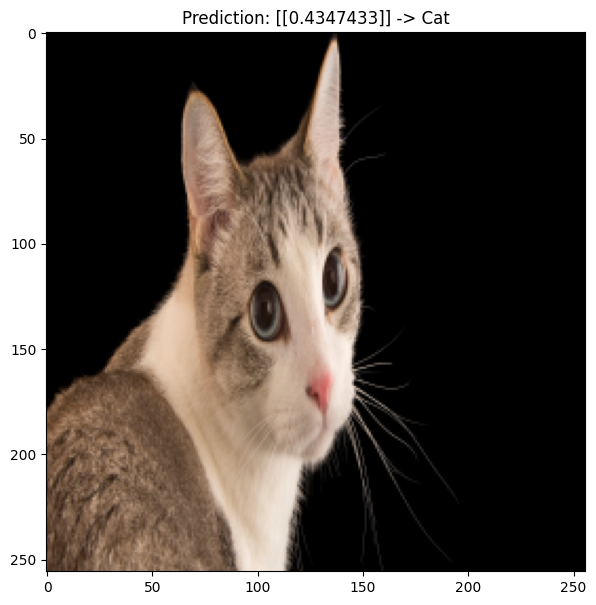

This is a cat


In [ ]:
test_image = cv2.imread(
    f"/content/drive/MyDrive/storage extension/Colab Notebooks/CSE463/Lab 3/23341134_UdoySaha_Lab3/Images/Cat.jpg"
)
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image = cv2.resize(test_image, (256, 256), interpolation=cv2.INTER_AREA)

# Reshape for a batch (the model expects a batch of images)
test_image_batch = np.expand_dims(test_image, axis=0)

# Predict on the new test_image
prediction = model.predict(test_image_batch)

plt.imshow(test_image)
plt.title(f"Prediction: {prediction} -> {'Dog' if prediction[0][0]>0.5 else 'Cat'}")
plt.show()

if prediction[0][0] > 0.5:
    print("This is a dog")
else:
    print("This is a cat")

## Part 2:


The VGG model architecture is such that it stacks multiple convolution layer in one convolution block.

It uses smaller kernels (3x3) instead of larger kernels. Because, a 5x5 kernel uses more parameters than 2 stacked 3x3 kernel and both the kernels work with similar efficiency. To make the model lighter, VGG use this trick.
